In [ ]:
# Importation des Bibliothéques 
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.metrics import f1_score, accuracy_score,recall_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor




In [ ]:
df = pd.read_csv('/content/Datafinal.csv')
df

,Unnamed: 0,Unnamed: 0.1,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,...,fonds,plein_air,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,description
0,839,839,1350000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,Ain Zaghouan,ain zaghouan nord,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb.72 contacter notre conseiller en immobilier...
1,9909,9909,840000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,NaN,"Ain Zaghouan, La Marsa, Tunis",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10757,10757,850000.0,450.0,450.0,NaN,ZAGHOUAN,NaN,NaN,"El Fahs, Zaghouan",...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25407,25407,946000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"jardin de carthage, Aïn Zaghouan, Tunis",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31229,31229,650000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"Zaghouan, Zaghouan",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,32472,32472,210000.0,150.0,150.0,1100.0,ZAGHOUAN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Appartement au 6 éme étage d’une résidence sé...
14117,32740,32740,367000.0,150.0,150.0,2046.0,ZAGHOUAN,LA MARSA,NaN,jardin de carthage/ Ville Tunis/ Région ai...,...,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,A VENDRE Un APPARTEMENT JAMAIS HABITÉ SITUÉE A...
14118,32743,32743,189000.0,150.0,150.0,2046.0,ZAGHOUAN,LA MARSA,NaN,jardinx de carthage/ Ville Tunis/ Région a...,...,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"s + 1 état neuf, salon avec balcon, une chambr..."
14119,33100,33100,216450000.0,150.0,150.0,2045.0,ZAGHOUAN,LA MARSA,NaN,"N° 63 Rue Khaled Ibn El Walid, Ain Zaghouan No...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Immobilière Camelia est une agence de promotio...


In [ ]:
df.drop('Unnamed: 0',
  axis='columns', inplace=True)

df.drop('Unnamed: 0.1',
  axis='columns', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121 entries, 0 to 14120
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    14121 non-null  float64
 1   superficie_habitable     14121 non-null  float64
 2   superficie_terrain       14121 non-null  float64
 3   codeP                    1794 non-null   float64
 4   gouvernorat              14121 non-null  object 
 5   delegation               10468 non-null  object 
 6   localite                 4224 non-null   object 
 7   adresse                  13168 non-null  object 
 8   anneeConst               80 non-null     object 
 9   nbpiece                  14121 non-null  int64  
 10  typeImm                  14121 non-null  object 
 11  fonds                    626 non-null    object 
 12  plein_air                0 non-null      float64
 13  salle_de_bain            4213 non-null   object 
 14  constructible         

In [ ]:
df.shape

(14121, 21)

In [ ]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df['gouvernorat']=labelencoder_X.fit_transform(df['gouvernorat'])
df['delegation']=labelencoder_X.fit_transform(df['delegation'])
df['localite']=labelencoder_X.fit_transform(df['localite'])
df['adresse']=labelencoder_X.fit_transform(df['adresse'])
df['anneeConst']= labelencoder_X.fit_transform(df['anneeConst']) 
df['typeImm']= labelencoder_X.fit_transform(df['typeImm']) 
df['fonds']= labelencoder_X.fit_transform(df['fonds']) 
df['salle_de_bain'] = labelencoder_X.fit_transform(df['salle_de_bain'])
df['constructible'] = labelencoder_X.fit_transform(df['constructible'])
df['description'] = labelencoder_X.fit_transform(df['description'])
df['superficie_habitable'] = labelencoder_X.fit_transform(df['superficie_habitable'])
df['superficie_terrain'] = labelencoder_X.fit_transform(df['superficie_terrain'])
df['price'] = labelencoder_X.fit_transform(df['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121 entries, 0 to 14120
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    14121 non-null  int64  
 1   superficie_habitable     14121 non-null  int64  
 2   superficie_terrain       14121 non-null  int64  
 3   codeP                    1794 non-null   float64
 4   gouvernorat              14121 non-null  int64  
 5   delegation               14121 non-null  int64  
 6   localite                 14121 non-null  int64  
 7   adresse                  14121 non-null  int64  
 8   anneeConst               14121 non-null  int64  
 9   nbpiece                  14121 non-null  int64  
 10  typeImm                  14121 non-null  int64  
 11  fonds                    14121 non-null  int64  
 12  plein_air                0 non-null      float64
 13  salle_de_bain            14121 non-null  int64  
 14  constructible         

In [ ]:
df.drop_duplicates(keep='first' , inplace = True)
df.shape

(12654, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12654 entries, 0 to 14120
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    12654 non-null  float64
 1   superficie_habitable     12654 non-null  float64
 2   superficie_terrain       12654 non-null  float64
 3   codeP                    1703 non-null   float64
 4   gouvernorat              12654 non-null  object 
 5   delegation               9177 non-null   object 
 6   localite                 3950 non-null   object 
 7   adresse                  11760 non-null  object 
 8   anneeConst               80 non-null     object 
 9   nbpiece                  12654 non-null  int64  
 10  typeImm                  12654 non-null  object 
 11  fonds                    600 non-null    object 
 12  plein_air                0 non-null      float64
 13  salle_de_bain            4032 non-null   object 
 14  constructible         

In [ ]:
df.columns

Index(['price', 'superficie_habitable', 'superficie_terrain', 'codeP',
       'gouvernorat', 'delegation', 'localite', 'adresse', 'anneeConst',
       'nbpiece', 'typeImm', 'fonds', 'plein_air', 'salle_de_bain',
       'constructible', 'service', 'chauffage', 'climatisation', 'cuisine',
       'installations_sportives', 'description'],
      dtype='object')

In [ ]:
df.isnull().sum()

price                          0
superficie_habitable           0
superficie_terrain             0
codeP                      10951
gouvernorat                    0
delegation                     0
localite                       0
adresse                        0
anneeConst                     0
nbpiece                        0
typeImm                        0
fonds                          0
plein_air                  12654
salle_de_bain                  0
constructible                  0
service                    12654
chauffage                  12654
climatisation              12654
cuisine                    12654
installations_sportives    12654
description                    0
dtype: int64

In [ ]:
indexModel=df[(df['localite'].str.contains('El Menzah 6'))|(df['adresse'].str.contains('el manzah 6'))| (df['adresse'].str.contains('menzah 6'))].index
df.loc[indexModel,['codeP']] = '2091'
indexModel=df[(df['localite'].str.contains('El Menzah 5'))|(df['adresse'].str.contains('el manzah 5'))| (df['adresse'].str.contains('menzah 5'))].index
df.loc[indexModel,['codeP']] = '2091'

indexModel=df[(df['localite'].str.contains('El Menzah 7'))|(df['adresse'].str.contains('el manzah 7'))| (df['adresse'].str.contains('menzah 7'))].index
df.loc[indexModel,['codeP']] = '2037'
indexModel=df[(df['localite'].str.contains('El Menzah 8'))|(df['adresse'].str.contains('el manzah 8'))| (df['adresse'].str.contains('menzah 8'))].index
df.loc[indexModel,['codeP']] = '2037'
#indexModel=df[(df['localite'].str.contains('El Menzah 8'))].index
#df.loc[indexModel,['adresse']] = 'el manzah 8'

indexModel=df[(df['localite'].str.contains('Cite Ennasr 2'))|(df['adresse'].str.contains('ennasr 2'))].index
df.loc[indexModel,['codeP']] = '2037'

indexModel=df[(df['localite'].str.contains('La Soukra'))|(df['adresse'].str.contains('la soukra'))|(df['adresse'].str.contains('soukra'))].index
df.loc[indexModel,['codeP']] = '2036'



#indexModel=df[(df['localite'].str.contains('BOU HNECH'))|(df['localite'].str.contains('CITE CHAKER'))|(df['localite'].str.contains('CITE DE LA MOSQUE'))|(df['localite'].str.contains('CITE EL MOUNTAZEH'))|(df['localite'].str.contains('Cite Ennour Jaafar'))|(df['localite'].str.contains('CITE ESSAADA'))|(df['localite'].str.contains('CITE SIDI SLIMENE'))|(df['localite'].str.contains('CITE SNIT'))|(df['localite'].str.contains('DOUAR EL HENDI'))|(df['localite'].str.contains('EL HESSIENE'))|(df['localite'].str.contains('OUED EL KHAYAT'))|(df['localite'].str.contains('OUED EL MAKHZEN'))|(df['localite'].str.contains('RESIDENCE EL AYECH'))|(df['localite'].str.contains('RESIDENCE EL OUNS'))|(df['localite'].str.contains('RESIDENCE ENNARJES'))].index
#df.loc[indexModel,['codeP']] = '2081'


AttributeError: ignored

In [ ]:
df.columns

Index(['price', 'superficie_habitable', 'superficie_terrain', 'codeP',
       'gouvernorat', 'delegation', 'localite', 'adresse', 'anneeConst',
       'nbpiece', 'typeImm', 'fonds', 'plein_air', 'salle_de_bain',
       'constructible', 'service', 'chauffage', 'climatisation', 'cuisine',
       'installations_sportives', 'description'],
      dtype='object')

In [ ]:
df.isnull().sum()

price                          0
superficie_habitable           0
superficie_terrain             0
codeP                      10414
gouvernorat                    0
delegation                  3477
localite                    8704
adresse                      894
anneeConst                 12574
nbpiece                        0
typeImm                        0
fonds                      12054
plein_air                  12654
salle_de_bain               8622
constructible              12529
service                    12654
chauffage                  12654
climatisation              12654
cuisine                    12654
installations_sportives    12654
description                 7763
dtype: int64

In [ ]:
df['fonds'] = df['fonds'].replace(np.nan, 0)
df['plein_air'] = df['plein_air'].replace(np.nan, 0)

df['salle_de_bain'] = df['salle_de_bain'].replace(np.nan, 1)

df['constructible'] = df['constructible'].replace(np.nan, 0)
df['service'] = df['service'].replace(np.nan, 0)

df['chauffage'] = df['chauffage'].replace(np.nan, 0)

df['climatisation'] = df['climatisation'].replace(np.nan, 0)
df['cuisine'] = df['cuisine'].replace(np.nan, 1)
df['installations_sportives'] = df['installations_sportives'].replace(np.nan, 0)

df['description'] = df['description'].replace(np.nan, 0)

df.isnull().sum()


price                          0
superficie_habitable           0
superficie_terrain             0
codeP                      10951
gouvernorat                    0
delegation                     0
localite                       0
adresse                        0
anneeConst                     0
nbpiece                        0
typeImm                        0
fonds                          0
plein_air                      0
salle_de_bain                  0
constructible                  0
service                        0
chauffage                      0
climatisation                  0
cuisine                        0
installations_sportives        0
description                    0
dtype: int64

In [ ]:
df.to_csv("new.csv",sep=",")
df

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,anneeConst,nbpiece,...,fonds,plein_air,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,description
0,1350000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,Ain Zaghouan,ain zaghouan nord,NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,fb.72 contacter notre conseiller en immobilier...
1,840000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,NaN,"Ain Zaghouan, La Marsa, Tunis",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,850000.0,450.0,450.0,NaN,ZAGHOUAN,NaN,NaN,"El Fahs, Zaghouan",NaN,0,...,0,0.0,3,0,0.0,0.0,0.0,0.0,0.0,0
3,946000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"jardin de carthage, Aïn Zaghouan, Tunis",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,650000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"Zaghouan, Zaghouan",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,210000.0,150.0,150.0,1100.0,ZAGHOUAN,NaN,NaN,NaN,NaN,0,...,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,Appartement au 6 éme étage d’une résidence sé...
14117,367000.0,150.0,150.0,2046.0,ZAGHOUAN,LA MARSA,NaN,jardin de carthage/ Ville Tunis/ Région ai...,NaN,4,...,1,0.0,3,0,0.0,0.0,0.0,0.0,0.0,A VENDRE Un APPARTEMENT JAMAIS HABITÉ SITUÉE A...
14118,189000.0,150.0,150.0,2046.0,ZAGHOUAN,LA MARSA,NaN,jardinx de carthage/ Ville Tunis/ Région a...,2016,2,...,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,"s + 1 état neuf, salon avec balcon, une chambr..."
14119,216450000.0,150.0,150.0,2045.0,ZAGHOUAN,LA MARSA,NaN,"N° 63 Rue Khaled Ibn El Walid, Ain Zaghouan No...",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,Immobilière Camelia est une agence de promotio...


In [ ]:
df.head()

,price,superficie_habitable,superficie_terrain,codeP,gouvernorat,delegation,localite,adresse,anneeConst,nbpiece,...,fonds,plein_air,salle_de_bain,constructible,service,chauffage,climatisation,cuisine,installations_sportives,description
0,1350000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,Ain Zaghouan,ain zaghouan nord,NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,fb.72 contacter notre conseiller en immobilier...
1,840000.0,150.0,150.0,NaN,ZAGHOUAN,LA MARSA,NaN,"Ain Zaghouan, La Marsa, Tunis",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,850000.0,450.0,450.0,NaN,ZAGHOUAN,NaN,NaN,"El Fahs, Zaghouan",NaN,0,...,0,0.0,3,0,0.0,0.0,0.0,0.0,0.0,0
3,946000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"jardin de carthage, Aïn Zaghouan, Tunis",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,650000.0,150.0,150.0,NaN,ZAGHOUAN,NaN,NaN,"Zaghouan, Zaghouan",NaN,0,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'price', 'superficie_habitable',
       'superficie_terrain', 'codeP', 'gouvernorat', 'delegation', 'localite',
       'adresse', 'anneeConst', 'nbpiece', 'typeImm', 'fonds', 'plein_air',
       'salle_de_bain', 'constructible', 'service', 'chauffage',
       'climatisation', 'cuisine', 'installations_sportives', 'description'],
      dtype='object')

## Split Data By Type

In [ ]:
grouped = df.groupby('typeImm')
  
df_commerce= grouped.get_group('commerce')
df_commerce.to_csv("df_commerce.csv",sep=",")

df_terrain= grouped.get_group('terrain')
df_terrain.to_csv("df_terrain.csv",sep=",")

df_maison= grouped.get_group('maison')
df_maison.to_csv("df_maison.csv",sep=",")

df_appartement= grouped.get_group('appartement')
df_appartement.to_csv("df_appartement.csv",sep=",")

In [ ]:
df_commerce.isnull().sum()


price                        0
superficie_habitable         0
superficie_terrain           0
codeP                      310
gouvernorat                  0
delegation                 109
localite                   187
adresse                     53
anneeConst                 413
nbpiece                      0
typeImm                      0
fonds                        0
plein_air                    0
salle_de_bain                0
constructible                0
service                      0
chauffage                    0
climatisation                0
cuisine                      0
installations_sportives      0
description                  0
dtype: int64

In [ ]:
df_commerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 13887
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    417 non-null    float64
 1   superficie_habitable     417 non-null    float64
 2   superficie_terrain       417 non-null    float64
 3   codeP                    90 non-null     float64
 4   gouvernorat              417 non-null    object 
 5   delegation               308 non-null    object 
 6   localite                 230 non-null    object 
 7   adresse                  364 non-null    object 
 8   anneeConst               4 non-null      object 
 9   nbpiece                  417 non-null    int64  
 10  typeImm                  417 non-null    object 
 11  fonds                    21 non-null     object 
 12  plein_air                0 non-null      float64
 13  salle_de_bain            47 non-null     object 
 14  constructible           

In [ ]:
df_terrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 5 to 13768
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    2614 non-null   float64
 1   superficie_habitable     2614 non-null   float64
 2   superficie_terrain       2614 non-null   float64
 3   codeP                    214 non-null    float64
 4   gouvernorat              2614 non-null   object 
 5   delegation               1956 non-null   object 
 6   localite                 650 non-null    object 
 7   adresse                  2410 non-null   object 
 8   anneeConst               12 non-null     object 
 9   nbpiece                  2614 non-null   int64  
 10  typeImm                  2614 non-null   object 
 11  fonds                    42 non-null     object 
 12  plein_air                0 non-null      float64
 13  salle_de_bain            27 non-null     object 
 14  constructible          

In [ ]:
df_maison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807 entries, 41 to 13925
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    2807 non-null   float64
 1   superficie_habitable     2807 non-null   float64
 2   superficie_terrain       2807 non-null   float64
 3   codeP                    409 non-null    object 
 4   gouvernorat              2807 non-null   object 
 5   delegation               1795 non-null   object 
 6   localite                 693 non-null    object 
 7   adresse                  2643 non-null   object 
 8   anneeConst               23 non-null     object 
 9   nbpiece                  2807 non-null   int64  
 10  typeImm                  2807 non-null   object 
 11  fonds                    2807 non-null   object 
 12  plein_air                2807 non-null   float64
 13  salle_de_bain            2807 non-null   object 
 14  constructible         

In [ ]:
df_appartement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6816 entries, 435 to 14120
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    6816 non-null   float64
 1   superficie_habitable     6816 non-null   float64
 2   superficie_terrain       6816 non-null   float64
 3   codeP                    1432 non-null   object 
 4   gouvernorat              6816 non-null   object 
 5   delegation               5118 non-null   object 
 6   localite                 2377 non-null   object 
 7   adresse                  6343 non-null   object 
 8   anneeConst               41 non-null     object 
 9   nbpiece                  6816 non-null   int64  
 10  typeImm                  6816 non-null   object 
 11  fonds                    6816 non-null   object 
 12  plein_air                6816 non-null   float64
 13  salle_de_bain            6816 non-null   object 
 14  constructible        

In [ ]:
df["typeImm"]

0           commerce
1           commerce
2           commerce
3           commerce
4           commerce
            ...     
14116    appartement
14117    appartement
14118    appartement
14119    appartement
14120    appartement
Name: typeImm, Length: 14121, dtype: object

#Feature Importance

## Correlation

In [ ]:
array = df.values
X1=df.drop("price",axis=1)
Y1=df["price"]

In [ ]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.00]
relevant_features

price                   1.000000
superficie_habitable    0.297691
superficie_terrain      0.297691
codeP                   0.042566
gouvernorat             0.077526
delegation              0.063275
localite                0.012231
adresse                 0.006753
anneeConst              0.007132
nbpiece                 0.058641
typeImm                 0.427960
fonds                   0.057102
salle_de_bain           0.184589
constructible           0.001609
description             0.029165
Name: price, dtype: float64

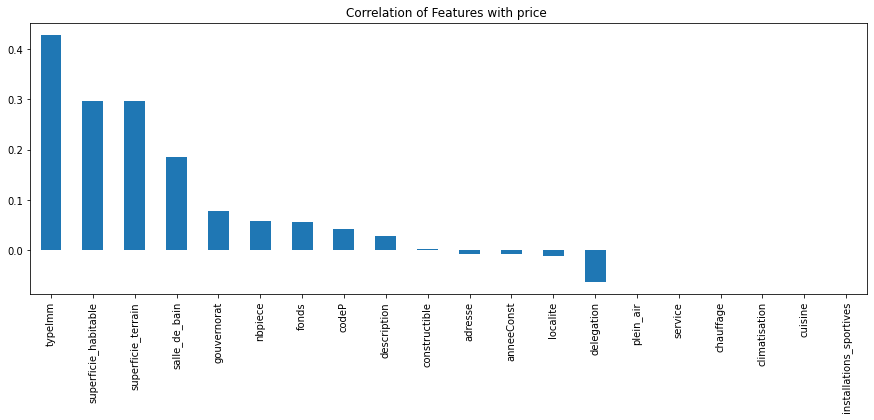

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with price ")
df.corr()['price'].drop(index='price').sort_values(ascending=False).plot(kind='bar')
plt.show()

## Anova

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
array = df.values
X1=df.drop("price",axis=1)
Y1=df["price"]


In [ ]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
#X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values

F_statistic, p_values = f_classif(X1,Y1)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X1.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [11 14 15 16 17 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical_Feature,F-Score,p values
0,typeImm,5.013231,0.000000e+00
1,constructible,3.009495,0.000000e+00
2,superficie_habitable,2.072240,0.000000e+00
3,superficie_terrain,2.072240,0.000000e+00
4,codeP,1.608315,0.000000e+00
5,gouvernorat,1.581328,0.000000e+00
6,salle_de_bain,1.381102,0.000000e+00
7,delegation,1.354300,0.000000e+00
8,description,1.291128,0.000000e+00
9,localite,1.234574,1.210000e-08


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features,
                                        target,
                                        test_size=.2,
                                        shuffle=True,
                                        random_state=42,
                                       
                                        )

RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
{'n_estimators': [10, 50, 200, 500]}
]
regressor = RandomForestRegressor(n_jobs=-1)

In [ ]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0,n_jobs=-1)
regressor.fit(X_train,y_train)
regressor.score(X_test, y_test)

0.6022675760825787

 XGBoost
 

In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train,y_train)
y_predXG = xg_reg.predict(X_test)

[15:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xg_reg.score(X_test,y_test)

0.6074362415369048

# Modeling By TypeImm

### Modeling By TypeImm Commerce

In [ ]:
df22 = pd.read_csv('/content/df_commerce.csv')


In [ ]:
array = df22.values
X22=df22.drop("price",axis=1)
y22=df22["price"]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train22,X_test22,y_train22,y_test22=train_test_split(X22,y22,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train22,y_train22)
y_predXG = xg_reg.predict(X_test22)

[11:17:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Commerce=xg_reg.score(X_test22,y_test22)
print(Commerce)

0.04345339556946781


### Modeling By TypeImm Maison

In [ ]:
df_maison = pd.read_csv('/content/df_maison.csv')


In [ ]:
array = df_maison.values
XM=df_maison.drop("price",axis=1)
yM=df_maison["price"]

In [ ]:
X_trainM,X_testM,y_trainM,y_testM=train_test_split(XM,yM,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_trainM,y_trainM)
y_predXG = xg_reg.predict(X_testM)

[11:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Maison=xg_reg.score(X_testM,y_testM)
print(Maison)

0.41607241250127625


### Modeling By TypeImm Terrain

In [ ]:
df_terrain = pd.read_csv('/content/df_terrain.csv')


In [ ]:
array = df_terrain.values
XT=df_terrain.drop("price",axis=1)
yT=df_terrain["price"]

In [ ]:
X_trainT,X_testT,y_trainT,y_testT=train_test_split(XT,yT,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_trainT,y_trainT)
y_predXG = xg_reg.predict(X_testT)

[11:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Terrain=xg_reg.score(X_testT,y_testT)
print(Terrain)

0.41171062721583296


### Modeling By TypeImm Appartement

In [ ]:
df_appartement = pd.read_csv('/content/df_appartement.csv')


In [ ]:
array = df_appartement.values
XA=df_appartement.drop("price",axis=1)
yA=df_appartement["price"]

In [ ]:
X_trainA,X_testA,y_trainA,y_testA=train_test_split(XA,yA,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_trainA,y_trainA)
y_predXG = xg_reg.predict(X_testA)

[11:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Appartement=xg_reg.score(X_testA,y_testA)
print(Appartement)

0.4251143823348169


# Modeling By gouvernorat

In [ ]:
grouped = df.groupby('gouvernorat')
  
df_NABEUL= grouped.get_group('NABEUL')
df_NABEUL.to_csv("df_NABEUL.csv",sep=",")

df_TUNIS= grouped.get_group('TUNIS')
df_TUNIS.to_csv("df_TUNIS.csv",sep=",")

df_ARIANA= grouped.get_group('ARIANA')
df_ARIANA.to_csv("df_ARIANA.csv",sep=",")

df_SOUSSE= grouped.get_group('SOUSSE')
df_SOUSSE.to_csv("df_SOUSSE.csv",sep=",")

df_BENAROUS= grouped.get_group('BEN AROUS')
df_BENAROUS.to_csv("df_BENAROUS.csv",sep=",")


In [ ]:
df3 = pd.read_csv('/content/df_NABEUL.csv')
df4 = pd.read_csv('/content/df_TUNIS.csv')
df5 = pd.read_csv('/content/df_ARIANA.csv')
df6 = pd.read_csv('/content/df_SOUSSE.csv')
df7 = pd.read_csv('/content/df_BENAROUS.csv')


### Modeling by Gouvernorat Nabeul

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4511 non-null   int64  
 1   price                    4511 non-null   float64
 2   superficie_habitable     4511 non-null   float64
 3   superficie_terrain       4511 non-null   float64
 4   codeP                    332 non-null    float64
 5   gouvernorat              4511 non-null   object 
 6   delegation               4157 non-null   object 
 7   localite                 561 non-null    object 
 8   adresse                  4368 non-null   object 
 9   anneeConst               13 non-null     float64
 10  nbpiece                  4511 non-null   int64  
 11  typeImm                  4511 non-null   object 
 12  fonds                    314 non-null    object 
 13  plein_air                0 non-null      float64
 14  salle_de_bain           

In [ ]:
array = df3.values
X3=df3.drop("price",axis=1)
y3=df3["price"]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train3,y_train3)
y_predXG = xg_reg.predict(X_test3)

[10:58:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Nabeul=xg_reg.score(X_test3,y_test3)
print(Nabeul)

0.43815050752487006


### Modeling by Gouvernorat Tunis

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1943 non-null   int64  
 1   price                    1943 non-null   float64
 2   superficie_habitable     1943 non-null   float64
 3   superficie_terrain       1943 non-null   float64
 4   codeP                    208 non-null    float64
 5   gouvernorat              1943 non-null   object 
 6   delegation               1394 non-null   object 
 7   localite                 1045 non-null   object 
 8   adresse                  1682 non-null   object 
 9   anneeConst               10 non-null     float64
 10  nbpiece                  1943 non-null   int64  
 11  typeImm                  1943 non-null   object 
 12  fonds                    62 non-null     object 
 13  plein_air                0 non-null      float64
 14  salle_de_bain           

In [ ]:
array = df4.values
X4=df4.drop("price",axis=1)
y4=df4["price"]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train4,y_train4)
y_predXG = xg_reg.predict(X_test4)

[11:05:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Tunis=xg_reg.score(X_test4,y_test4)
print(Tunis)

0.7213812830014115


### Modeling by Gouvernorat Ariana

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1907 non-null   int64  
 1   price                    1907 non-null   float64
 2   superficie_habitable     1907 non-null   float64
 3   superficie_terrain       1907 non-null   float64
 4   codeP                    205 non-null    float64
 5   gouvernorat              1907 non-null   object 
 6   delegation               1624 non-null   object 
 7   localite                 905 non-null    object 
 8   adresse                  1701 non-null   object 
 9   anneeConst               21 non-null     object 
 10  nbpiece                  1907 non-null   int64  
 11  typeImm                  1907 non-null   object 
 12  fonds                    62 non-null     object 
 13  plein_air                0 non-null      float64
 14  salle_de_bain           

In [ ]:
array = df5.values
X5=df5.drop("price",axis=1)
y5=df5["price"]

In [ ]:
X_train5,X_test5,y_train5,y_test5=train_test_split(X5,y5,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train5,y_train5)
y_predXG = xg_reg.predict(X_test5)

[11:01:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Ariana=xg_reg.score(X_test5,y_test5)
print(Ariana)

0.7049034504050959


### Modeling by Gouvernorat Sousse

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1491 non-null   int64  
 1   price                    1491 non-null   float64
 2   superficie_habitable     1491 non-null   float64
 3   superficie_terrain       1491 non-null   float64
 4   codeP                    494 non-null    float64
 5   gouvernorat              1491 non-null   object 
 6   delegation               921 non-null    object 
 7   localite                 651 non-null    object 
 8   adresse                  1402 non-null   object 
 9   anneeConst               11 non-null     float64
 10  nbpiece                  1491 non-null   int64  
 11  typeImm                  1491 non-null   object 
 12  fonds                    69 non-null     object 
 13  plein_air                0 non-null      float64
 14  salle_de_bain           

In [ ]:
array = df6.values
X6=df6.drop("price",axis=1)
y6=df6["price"]

In [ ]:
X_train6,X_test6,y_train6,y_test6=train_test_split(X6,y6,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train6,y_train6)
y_predXG = xg_reg.predict(X_test6)

[11:02:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Sousse=xg_reg.score(X_test6,y_test6)
print(Sousse)

0.611935753611589


### Modeling by Gouvernorat Ben Arous


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               865 non-null    int64  
 1   price                    865 non-null    float64
 2   superficie_habitable     865 non-null    float64
 3   superficie_terrain       865 non-null    float64
 4   codeP                    243 non-null    float64
 5   gouvernorat              865 non-null    object 
 6   delegation               472 non-null    object 
 7   localite                 288 non-null    object 
 8   adresse                  752 non-null    object 
 9   anneeConst               10 non-null     float64
 10  nbpiece                  865 non-null    int64  
 11  typeImm                  865 non-null    object 
 12  fonds                    36 non-null     object 
 13  plein_air                0 non-null      float64
 14  salle_de_bain            3

In [ ]:
array = df7.values
X7=df7.drop("price",axis=1)
y7=df7["price"]

In [ ]:
X_train7,X_test7,y_train7,y_test7=train_test_split(X7,y7,train_size=0.8,test_size=0.2,random_state=0)


In [ ]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.3,
                max_depth = 5, alpha = 1, n_estimators = 300)
xg_reg.fit(X_train7,y_train7)
y_predXG = xg_reg.predict(X_test7)

[11:02:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Ben_Arous=xg_reg.score(X_test7,y_test7)
print(Ben_Arous)

0.6102417978505053


## Evaluation Modeling By TypeImm

In [ ]:
models = pd.DataFrame({
    'Model': ['Commerce','Maison',
              'Terrain','Appartement'],
    'Accuracy': [Commerce,Maison,Terrain,Appartement]})
models.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
3,Appartement,0.425114
1,Maison,0.416072
2,Terrain,0.411711
0,Commerce,0.043453


## Evaluation Modeling By Gouvernorat

In [ ]:

models = pd.DataFrame({
    'Model': ['Nabeul','Tunis',
              'Ariana','Sousse','Ben_Arous'],
    'Accuracy': [Nabeul,Tunis,Ariana,Sousse,Ben_Arous]})
models.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
1,Tunis,0.721381
2,Ariana,0.704903
3,Sousse,0.611936
4,Ben_Arous,0.610242
0,Nabeul,0.438151
